In [1]:
pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.3/11.3 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use 


[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING THE DATASET (I had skiprows 4 because it contain the metadata so that i can read the data correctely)

In [31]:
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv.csv', skiprows=4)

# showing the first 5 rows



In [2]:
print(df.head(5))

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

# Understanding the Structure of a DataFrame Using df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

## Check for missing values

In [7]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024                1
Unnamed: 69       266
Length: 70, dtype: int64

## select the Country and 2024 column

In [13]:
df_pop = df[['Country Name','2024']].dropna()


## Converting population data to numeric (Some rows may have missing or empty values)

In [17]:
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')


## To find top 10 most populated countries in 2024:

In [18]:
top10 = df_pop.sort_values(by='2024', ascending=False).head(10)


##  Visualizing with Bar Chart

C:\Users\admin\AppData\Local\Temp\ipykernel_17380\1829536240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Country Name", x="2024", data=top10, palette="Set2")


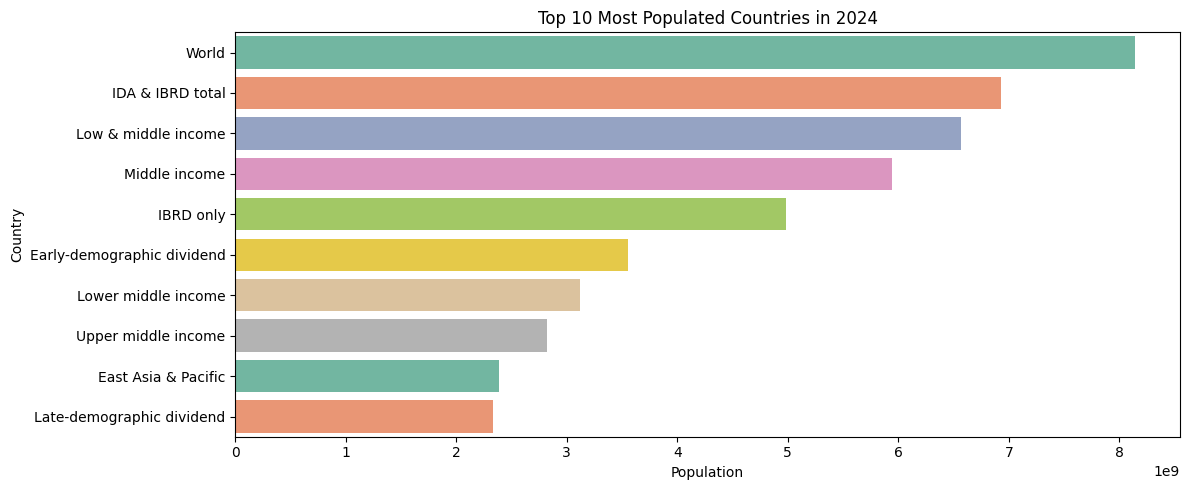

In [27]:
plt.figure(figsize=(12, 5))
sns.barplot(y="Country Name", x="2024", data=top10, palette="Set2")
plt.title('Top 10 Most Populated Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## A histogram will show the distribution of population values across all countries in 2024

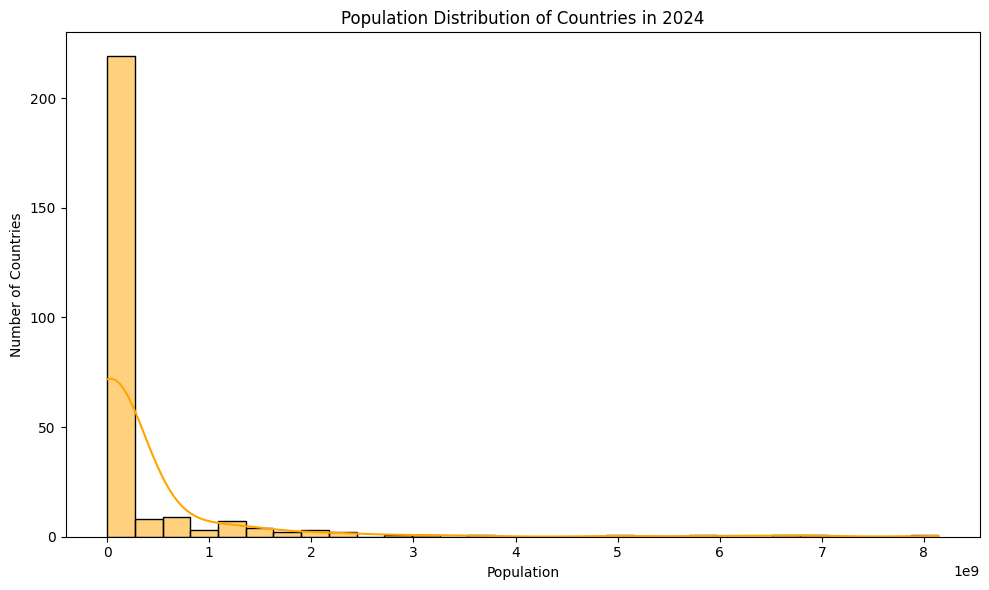

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_pop, x='2024', bins=30, kde=True, color='orange')
plt.title('Population Distribution of Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()